<a href="https://colab.research.google.com/github/m-ritam/ML/blob/main/ML_Linear_Regression_to_predict_salary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Libraries**

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Import dataset and extract dependent and independent variables**

In [45]:
salary_data = pd.read_csv("/content/drive/My Drive/Excel file to use in colab/Salary_Data.csv")
X = salary_data.iloc[:, :-1].values
y = salary_data.iloc[:, 1].values

**`Visualizing the dataset`**

In [46]:
salary_data

,Years of Experience,Salary
0,5.0,90000
1,3.0,65000
2,15.0,150000
3,7.0,60000
4,20.0,200000
...,...,...
6699,20.0,200000
6700,3.0,50000
6701,4.0,55000
6702,14.0,140000


In [47]:
y

array([ 90000,  65000, 150000, ...,  55000, 140000,  35000])

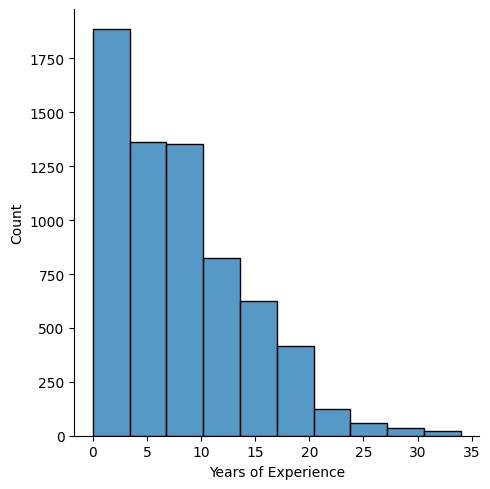

In [48]:
#visualizing the dataset
sns.displot(salary_data['Years of Experience'],kde=False,bins=10)

<Axes: xlabel='count', ylabel='Years of Experience'>

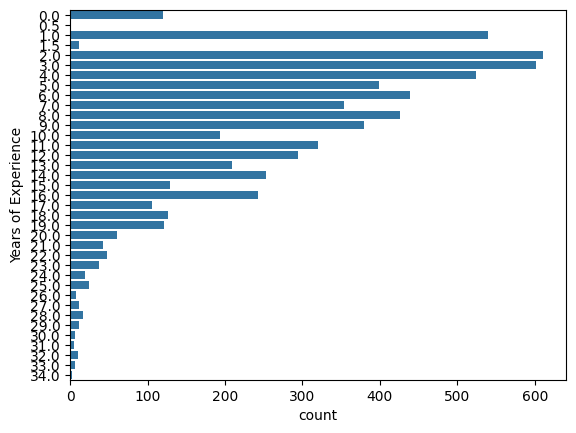

In [49]:
sns.countplot(y='Years of Experience',data=salary_data)

<Axes: xlabel='Years of Experience', ylabel='Salary'>

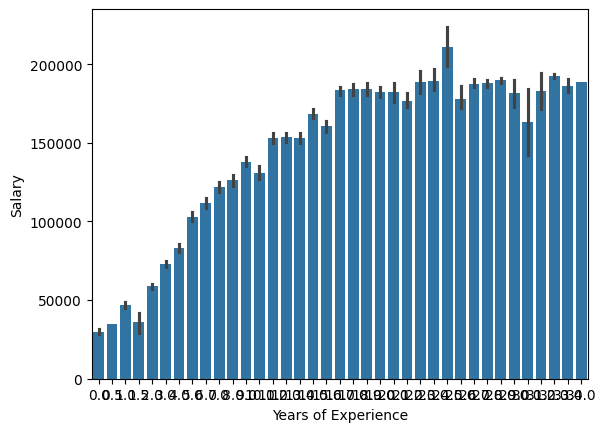

In [50]:
sns.barplot(x='Years of Experience',y='Salary',data=salary_data)

<Axes: >

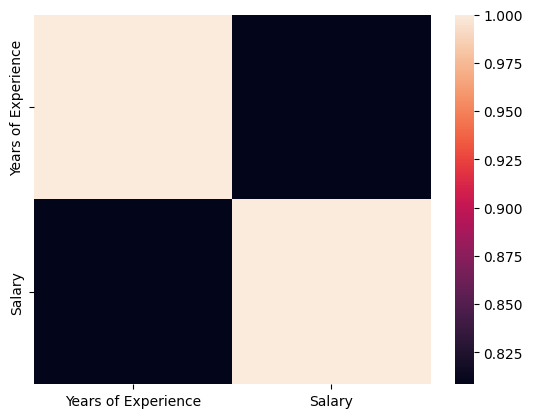

In [51]:
sns.heatmap(salary_data.corr())

**Splitting the dataset into Training set and Test set**

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

**Fitting simple Linerar regression**

In [53]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

**Predicting the test set results**

In [54]:
y_pred = lr.predict(X_test)
y_pred

array([128610.42214688, 149622.31673339,  72578.70324952, ...,
       177638.17618207, 170634.2113199 ,  93590.59783603])

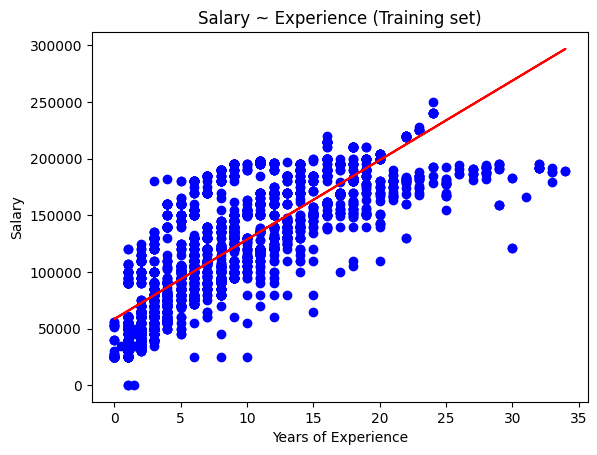

In [56]:
#Visulising the training set results
plt.scatter(X_train, y_train, color = 'blue')
plt.plot(X_train, lr.predict(X_train), color = 'red')
plt.title('Salary ~ Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

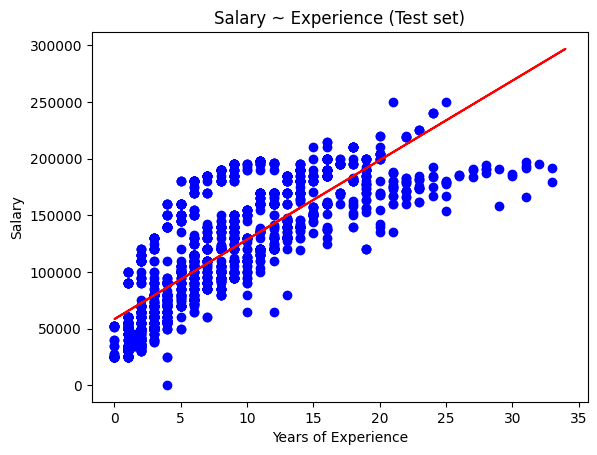

In [58]:
#Visulising the Test set results
plt.scatter(X_test, y_test, color = 'blue')
plt.plot(X_train, lr.predict(X_train), color = 'red')
plt.title('Salary ~ Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [60]:
#Finding the residuals(errors)
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 25148.184487571525
MSE: 973894168.5700645
RMSE: 31207.277493720347
